# Ch 4 - Classification

This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #visualization library
from sklearn.linear_model import LogisticRegression #problem will be solved with scikit
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #linear discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #quadratic discriminant analysis
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbours (KNN)
from sklearn.naive_bayes import GaussianNB

import statsmodels.api as sm #to compute p-values
import statsmodels.formula.api as smf
from patsy import dmatrices

%matplotlib inline

In [21]:
df = pd.read_csv('data/Weekly.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


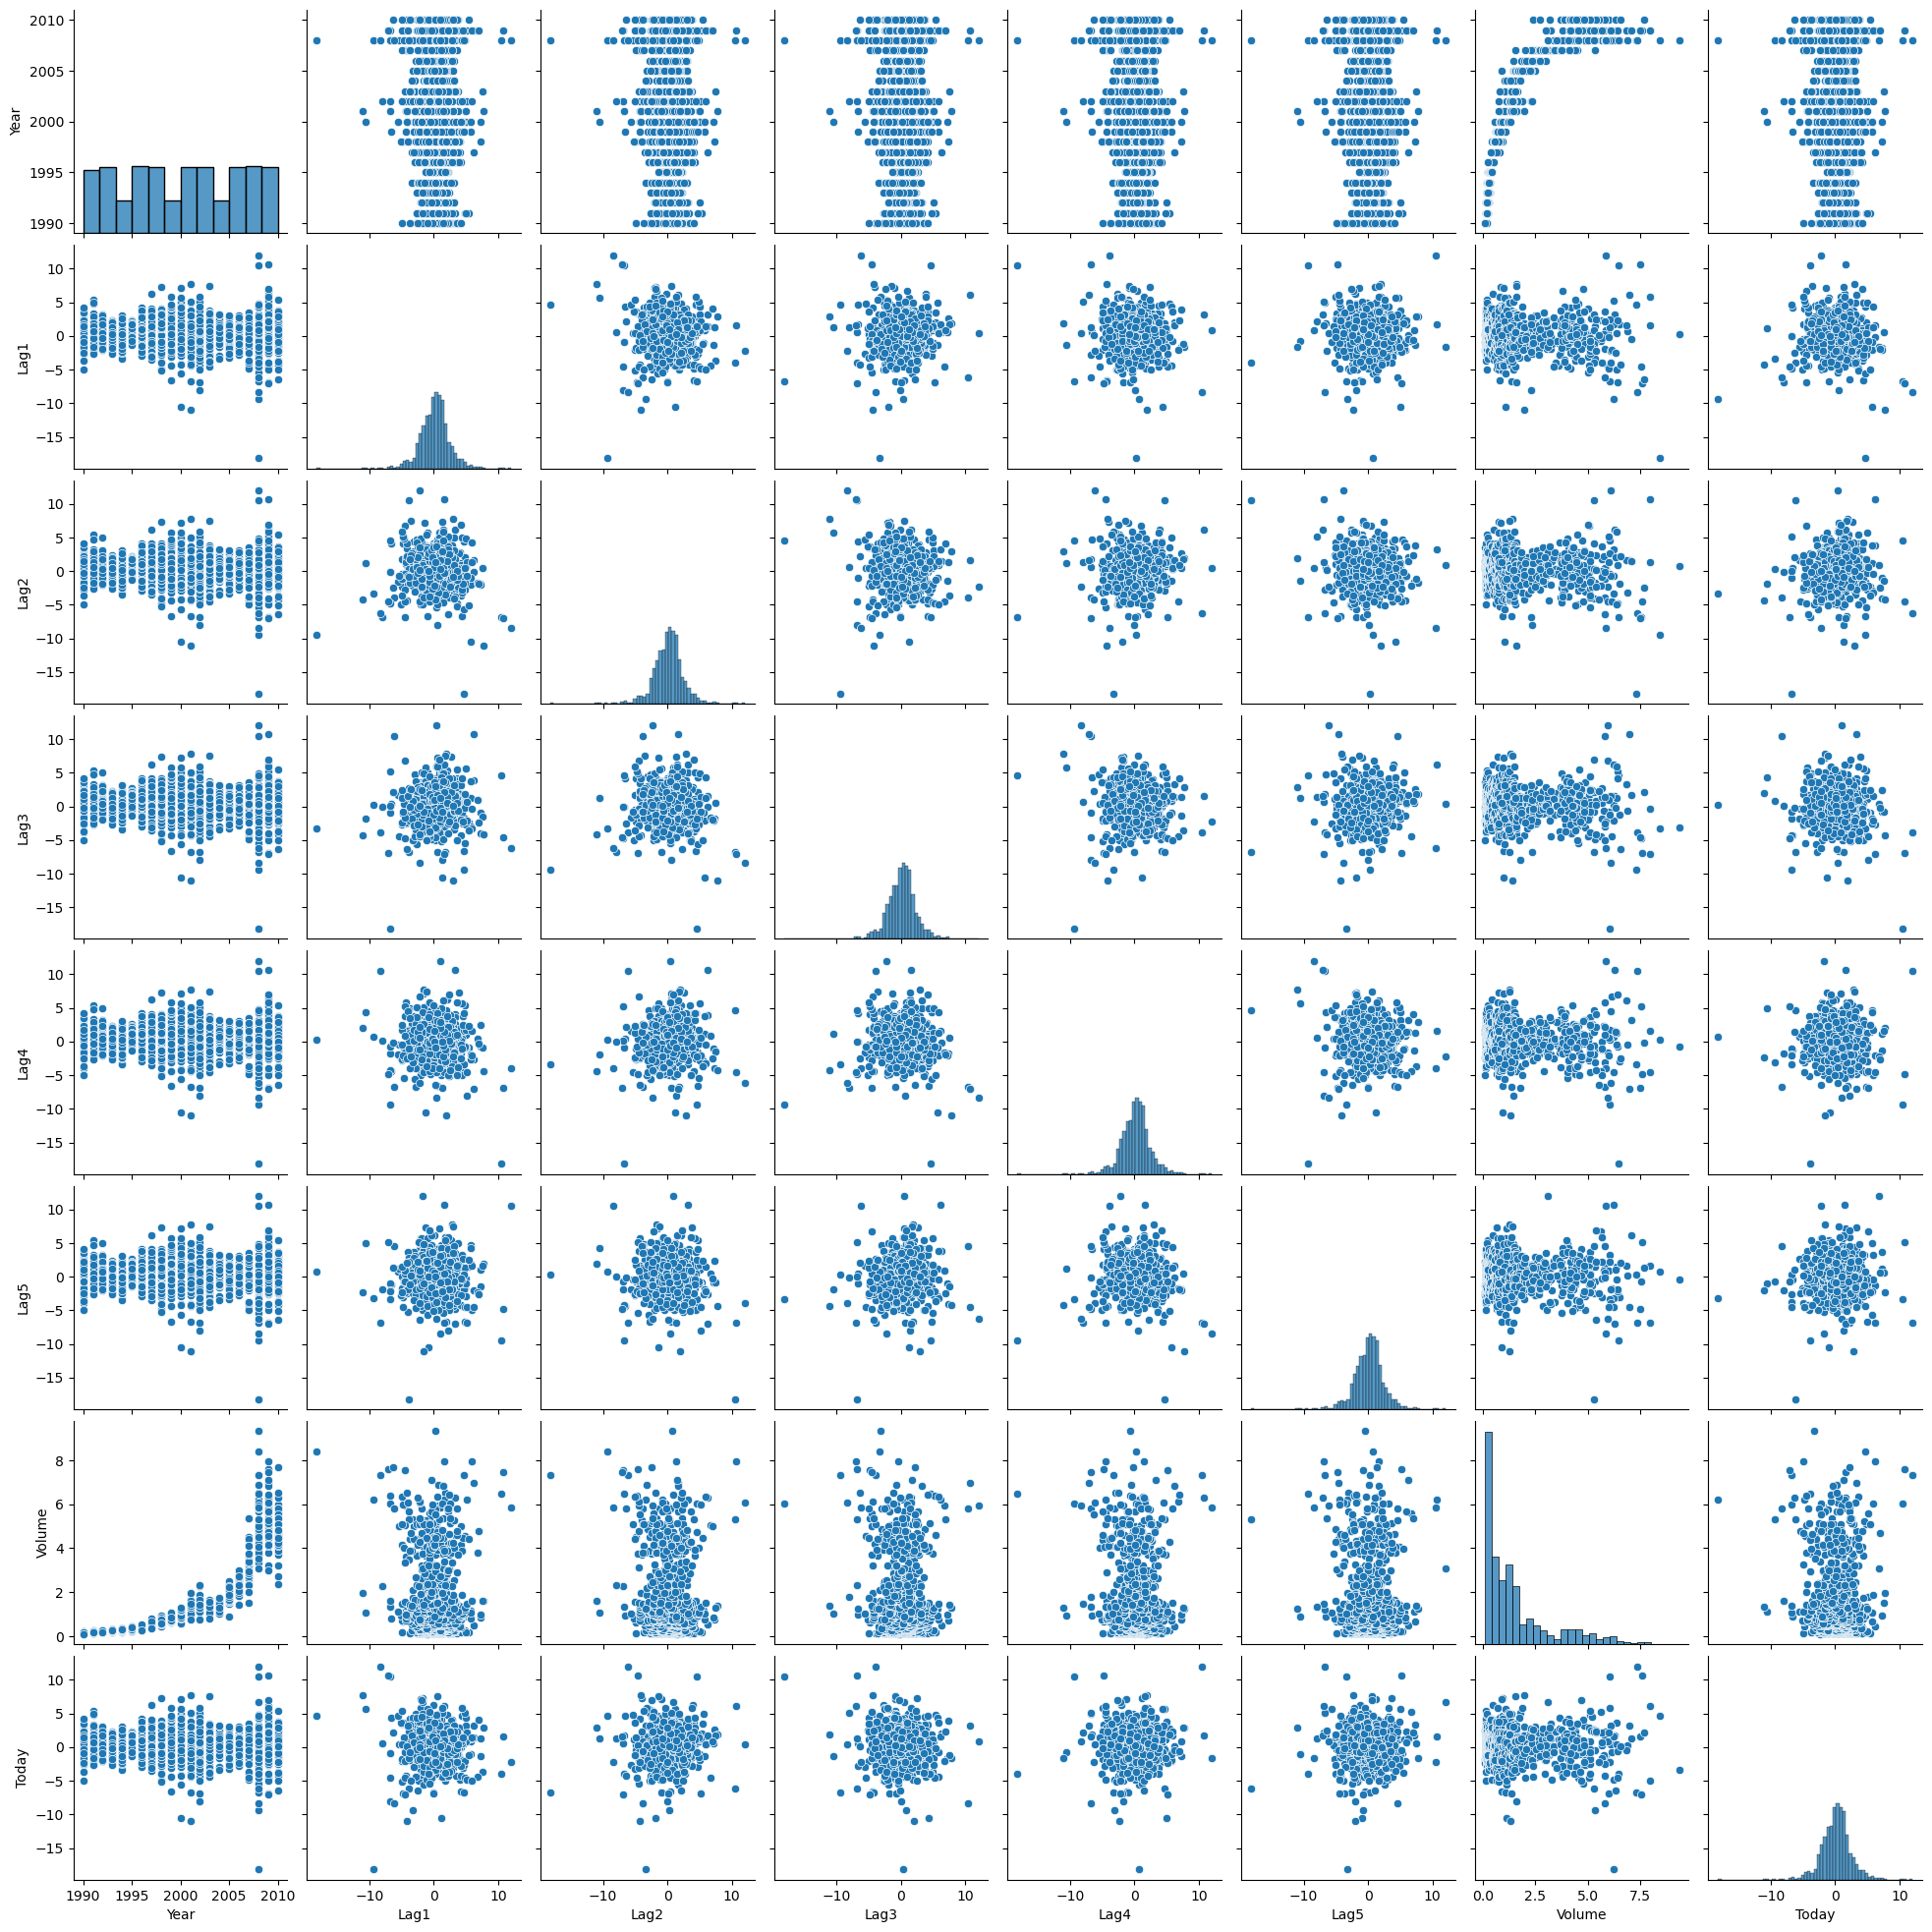

In [5]:
# (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?
sns.pairplot(df.drop(columns=['Direction']))

Looks like some interesting relationship between year and volume

<Axes: xlabel='Year', ylabel='Volume'>

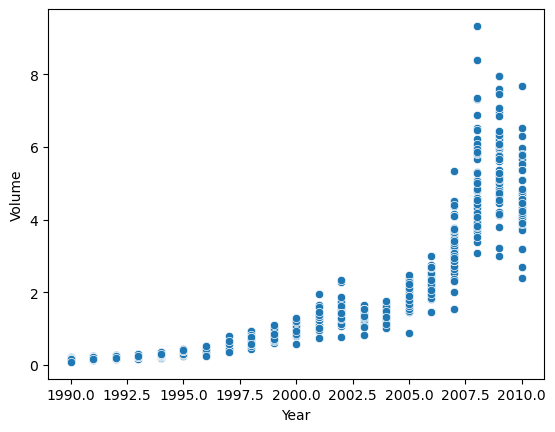

In [6]:
sns.scatterplot(data=df, x='Year', y='Volume')

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [4]:
df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [22]:
# Convert target into binary
df['y'] = df['Direction'].map({"Down": 0, "Up": 1})

# Use stats models for logistic regression
X = df.drop(columns=['Year', 'Today', 'Direction', 'y'])
y = df['y']

In [23]:
# Use stats models
model_string = 'y ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
model = smf.glm(model_string, family=sm.families.Binomial(), data=df)
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Thu, 19 Jun 2025   Deviance:                       1486.4
Time:                        14:44:59   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.0

Looks like p-values are significant ONLY for Lag2

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [14]:
X

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,y
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,0
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574,0
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837,1
3,3.514,-2.576,-0.270,0.816,1.572,0.161630,1
4,0.712,3.514,-2.576,-0.270,0.816,0.153728,1
...,...,...,...,...,...,...,...
1084,-0.861,0.043,-2.173,3.599,0.015,3.205160,1
1085,2.969,-0.861,0.043,-2.173,3.599,4.242568,1
1086,1.281,2.969,-0.861,0.043,-2.173,4.835082,1
1087,0.283,1.281,2.969,-0.861,0.043,4.454044,1


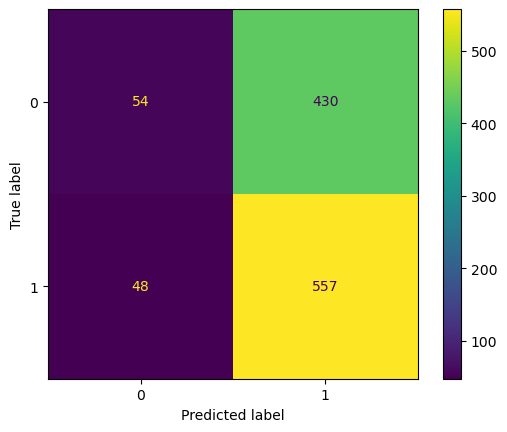

In [24]:
# Redo with sklearn since easier for predictive
model = LogisticRegression().fit(X, y)
preds = model.predict(X)
conf_mat = confusion_matrix(df['y'], preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
disp.plot()

In [27]:
print(classification_report(df['y'], preds))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18       484
           1       0.56      0.92      0.70       605

    accuracy                           0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [46]:
df_train = df[2008 >= df['Year']]
df_test = df[df['Year'] > 2008]

X_train = df_train.drop(columns=['Year', 'Direction','y'])[['Lag2']]
y_train = df_train['y']

X_test = df_test.drop(columns=['Year', 'Direction', 'y'])[['Lag2']]
y_test = df_test['y']

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)

[[ 9 34]
 [ 5 56]]


In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [55]:
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

Accuracy Score = 62.5%


In [57]:
# (e) Repeat using LDA
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

[[ 9 34]
 [ 5 56]]
Accuracy Score = 62.5%


In [58]:
# (f) Repeat (d) using QDA.
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

[[ 0 43]
 [ 0 61]]
Accuracy Score = 58.7%


In [59]:
# (g) Repeat (d) using KNN with K = 1
model = KNeighborsClassifier().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

[[15 28]
 [21 40]]
Accuracy Score = 52.9%


In [61]:
# (h) Repeat (d) using naive Bayes.
model = GaussianNB().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

[[ 0 43]
 [ 0 61]]
Accuracy Score = 58.7%


(i) Which of these methods appears to provide the best results on this data?

- Logistic Regression and LDA had highest accuracy

(j) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [63]:
# Use stats models
model_string = 'y ~ Lag2'
model = smf.glm(model_string, family=sm.families.Binomial(), data=df)
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1087
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -745.21
Date:                Thu, 19 Jun 2025   Deviance:                       1490.4
Time:                        15:22:28   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.005297
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.0

In [ ]:
# Use log
model = GaussianNB().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

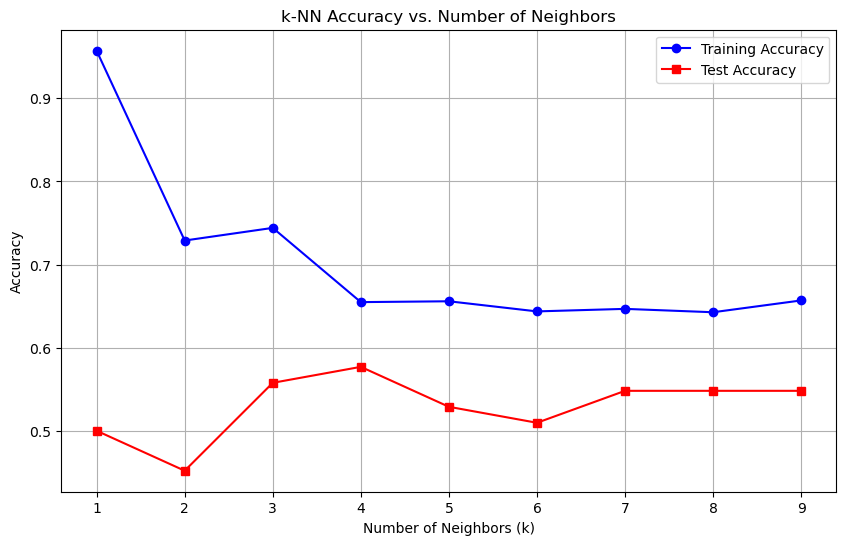

Best Test Accuracy: 0.5769 at k = 4


In [64]:
k_values = range(1, 10)  # Try k from 1 to 20

# Lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop over different k values
for k in k_values:
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on training data
    knn.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Compute accuracy for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Print the best test accuracy and corresponding k
best_test_accuracy = max(test_accuracies)
best_k = k_values[test_accuracies.index(best_test_accuracy)]
print(f"Best Test Accuracy: {best_test_accuracy:.4f} at k = {best_k}")

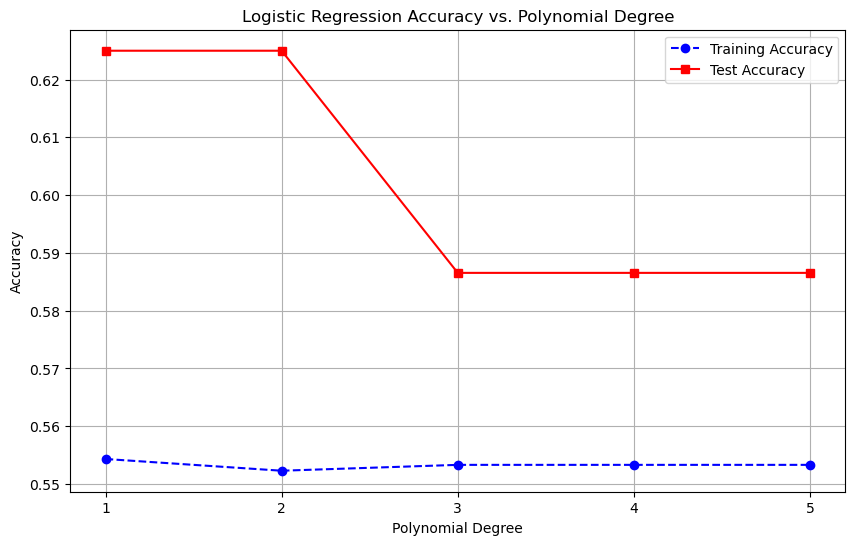

Best Test Accuracy: 0.6250 at Degree = 1


In [65]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Range of polynomial degrees to try
degrees = range(1, 6)  # Try degrees 1 to 5

# Lists to store accuracies for each degree
train_accuracies = []
test_accuracies = []

# Loop over polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    
    # Transform training and test data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Scale features (recommended for Logistic Regression)
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    
    # Initialize and train Logistic Regression model
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train_poly_scaled, y_train)
    
    # Predict on training and test data
    y_train_pred = logreg.predict(X_train_poly_scaled)
    y_test_pred = logreg.predict(X_test_poly_scaled)
    
    # Compute accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, label='Training Accuracy', marker='o', color='blue', linestyle='--')
plt.plot(degrees, test_accuracies, label='Test Accuracy', marker='s', color='red', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Polynomial Degree')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

# Find and print the best test accuracy
best_accuracy = max(test_accuracies)
best_degree = degrees[test_accuracies.index(best_accuracy)]
print(f"Best Test Accuracy: {best_accuracy:.4f} at Degree = {best_degree}")

# Problem 14 - Auto Data Classifier
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:
Auto['mpg01'] = mpg01

In [103]:
auto = pd.read_csv("./data/Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [104]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [105]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [106]:
auto['mpg01'] = (auto['mpg'] > auto['mpg'].median())*1
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

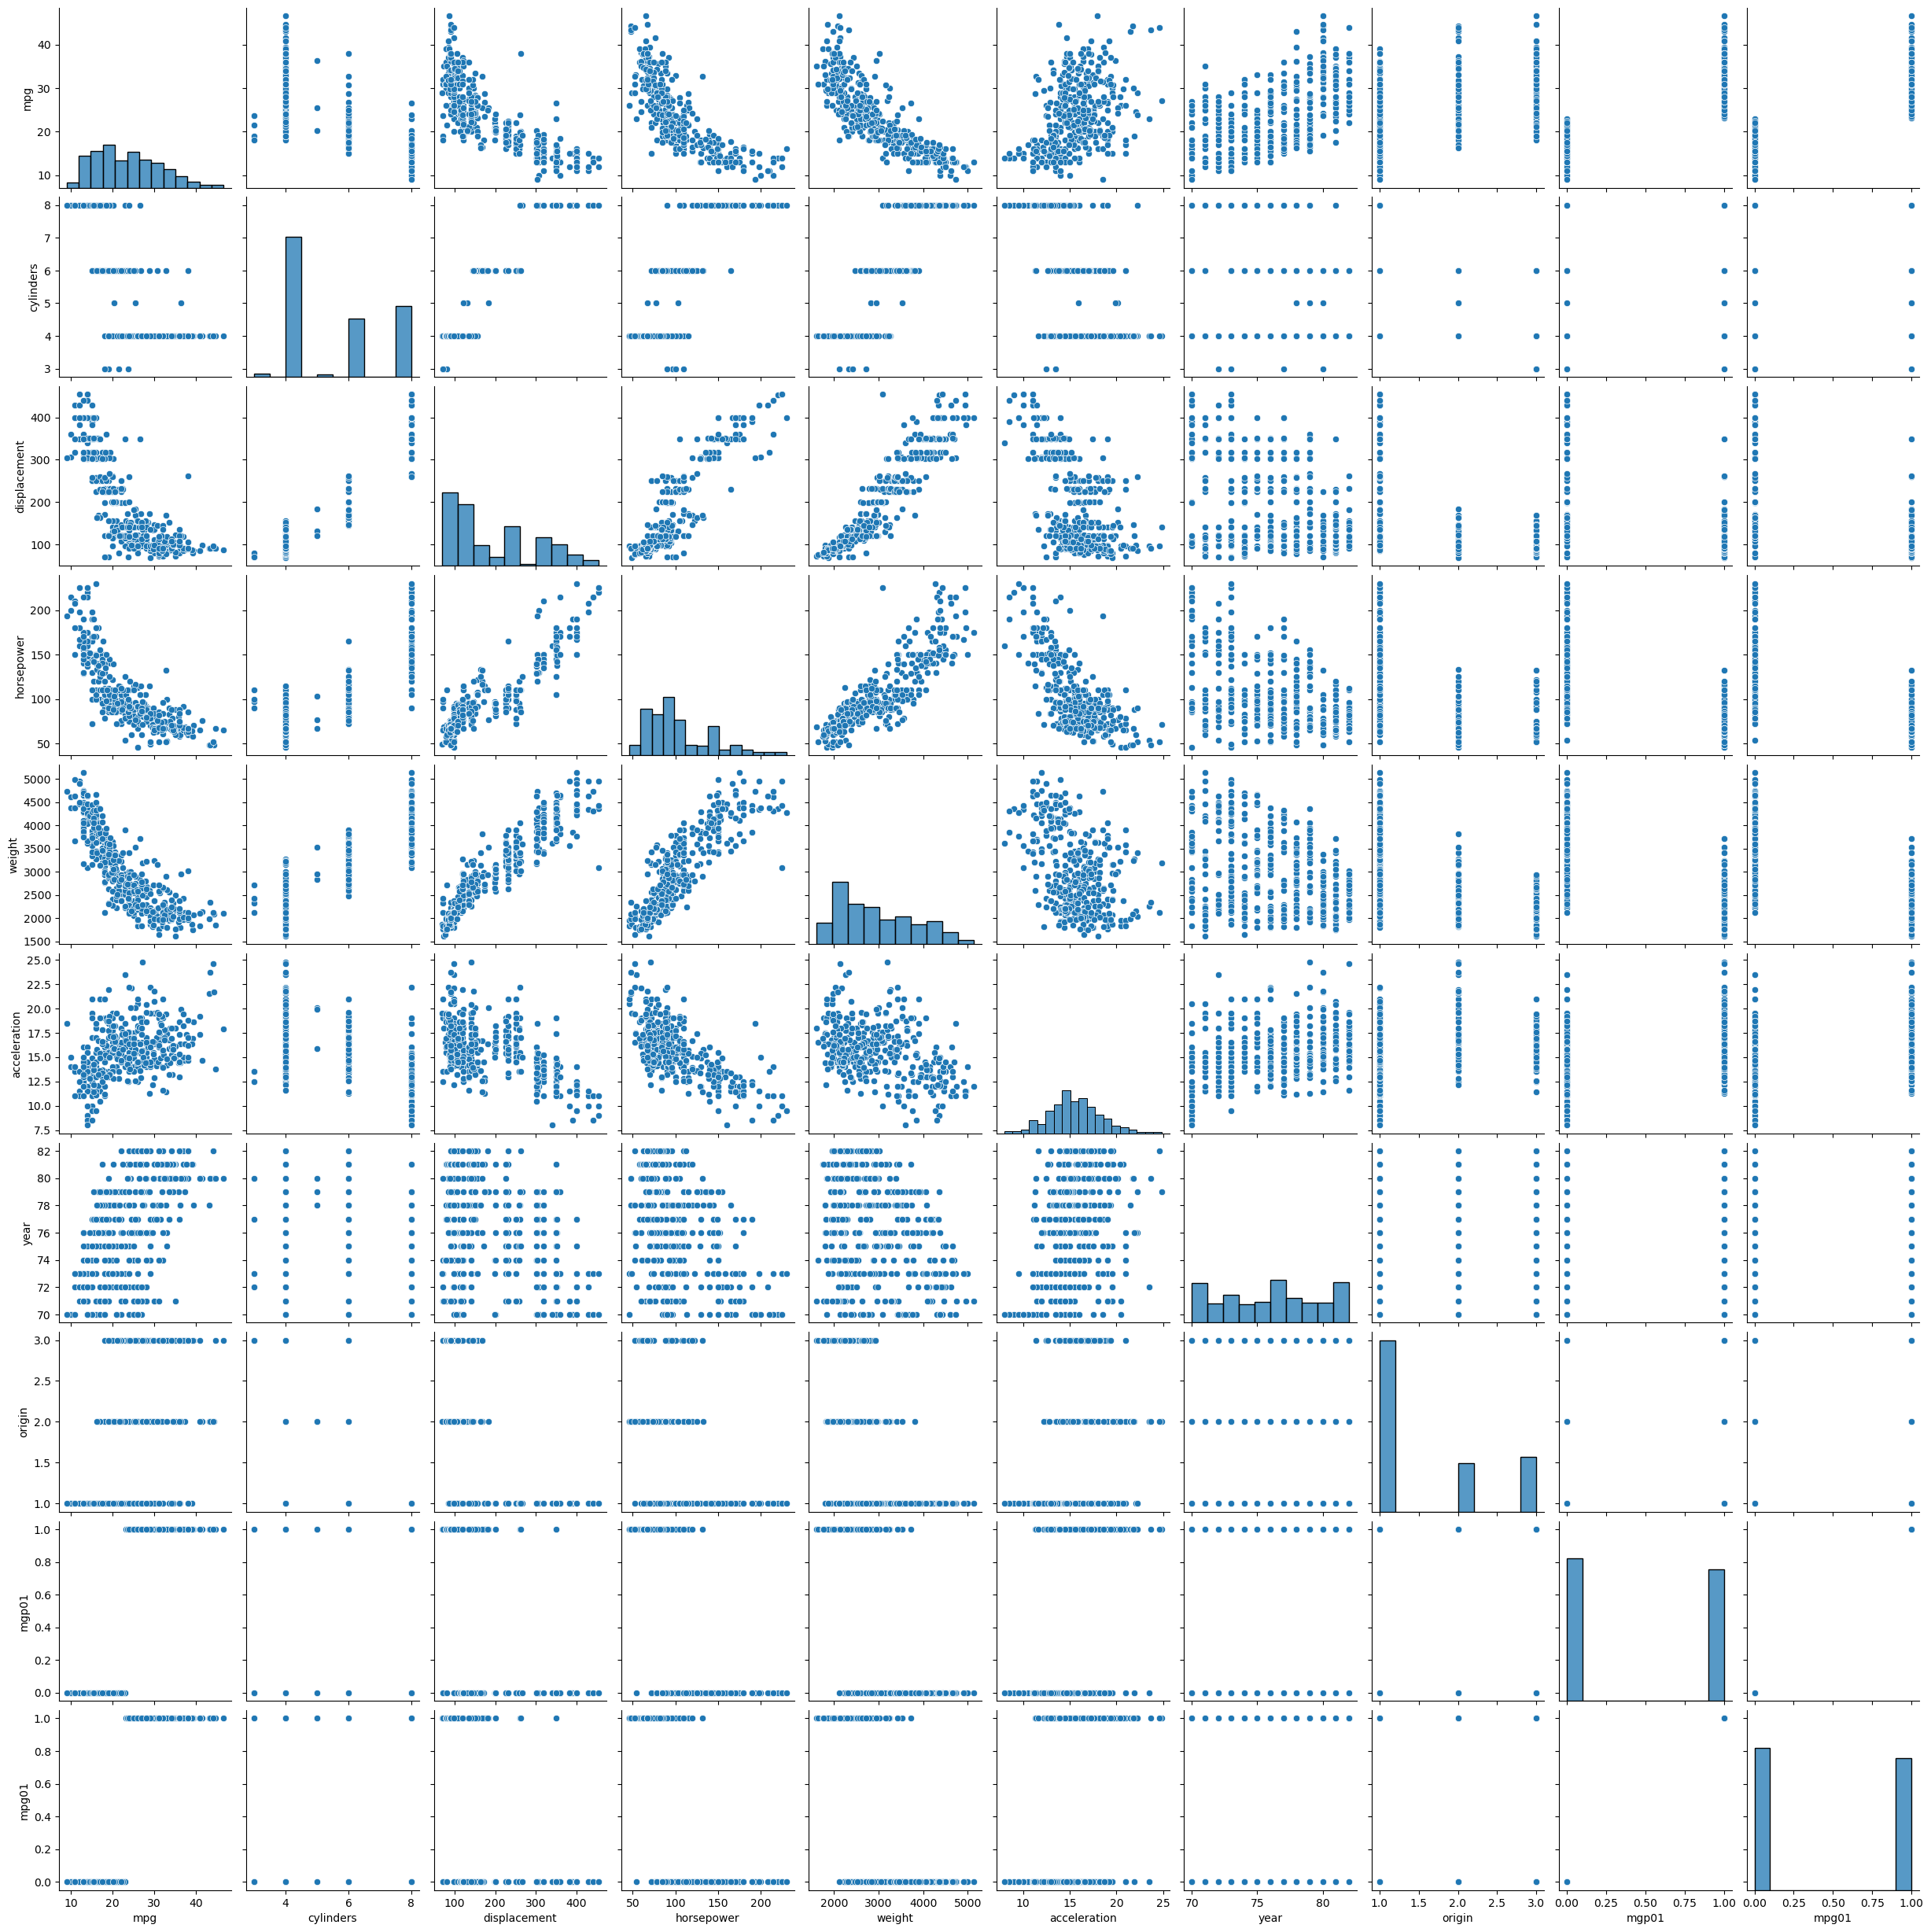

In [97]:
g = sns.pairplot(auto.drop(columns=['name']))

In [107]:
auto.drop(columns=['name']).corr()[['mpg01']].sort_values(by=['mpg01'])

,mpg01
weight,-0.745734
cylinders,-0.740327
displacement,-0.738607
horsepower,-0.649259
acceleration,0.322629
year,0.454108
origin,0.511393
mpg,0.838239
mpg01,1.000000


- Interesting relationships for predicting mpg --> based on corr table almost everything looks moderately interesting. Key says to focus on weight, cylinders, and displacement, all around -0.75.


(c) Split the data into a training set and a test set.
(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [108]:
# (c) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(auto[['cylinders', 'weight', 'displacement']], auto['mpg01'], random_state=1)

In [109]:
# (d)
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(f"Accuracy Score = {accuracy_score(y_test, preds):.1%}")

[[44  8]
 [ 3 45]]
Accuracy Score = 89.0%


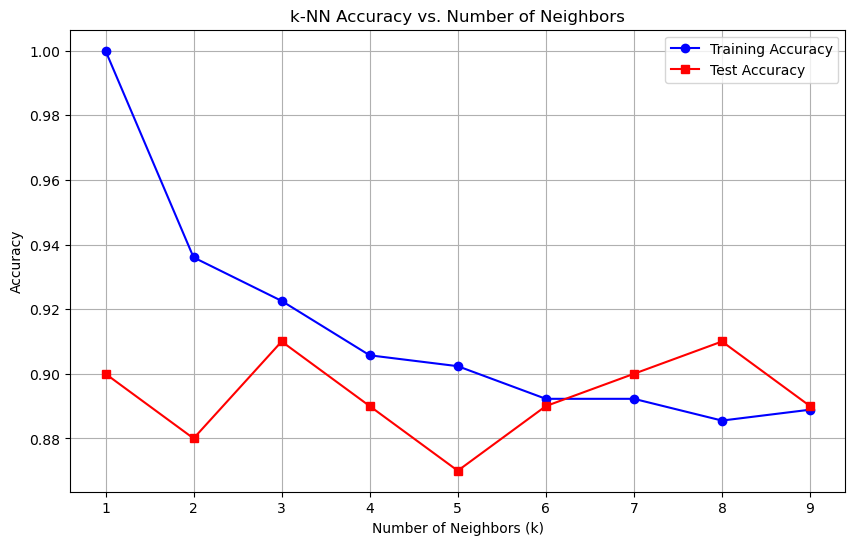

Best Test Accuracy: 0.9100 at k = 3


In [110]:
k_values = range(1, 10)  # Try k from 1 to 20

# Lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop over different k values
for k in k_values:
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on training data
    knn.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Compute accuracy for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Print the best test accuracy and corresponding k
best_test_accuracy = max(test_accuracies)
best_k = k_values[test_accuracies.index(best_test_accuracy)]
print(f"Best Test Accuracy: {best_test_accuracy:.4f} at k = {best_k}")

# Problem 16 - Boston Classifiers
Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

In [112]:
boston = pd.read_csv('./data/Boston.csv')
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB
None


In [ ]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [117]:
# Curate dataset
boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']]
boston['crime_rate'] = (boston['crim'] > boston['crim'].median())*1.0

# Look at features
boston.corr()[['crime_rate']].sort_values(by=['crime_rate'])

,crime_rate
dis,-0.616342
zn,-0.436151
medv,-0.263017
rm,-0.156372
chas,0.070097
ptratio,0.253568
crim,0.409395
lstat,0.453263
indus,0.603260
tax,0.608741


In [123]:
X = boston[['dis', 'tax', 'age', 'rad', 'nox']] # Highest corr features
X = boston.drop(columns=['crim', 'crime_rate']) # all features
y = boston['crime_rate']

X.corr()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
zn,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
ptratio,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787


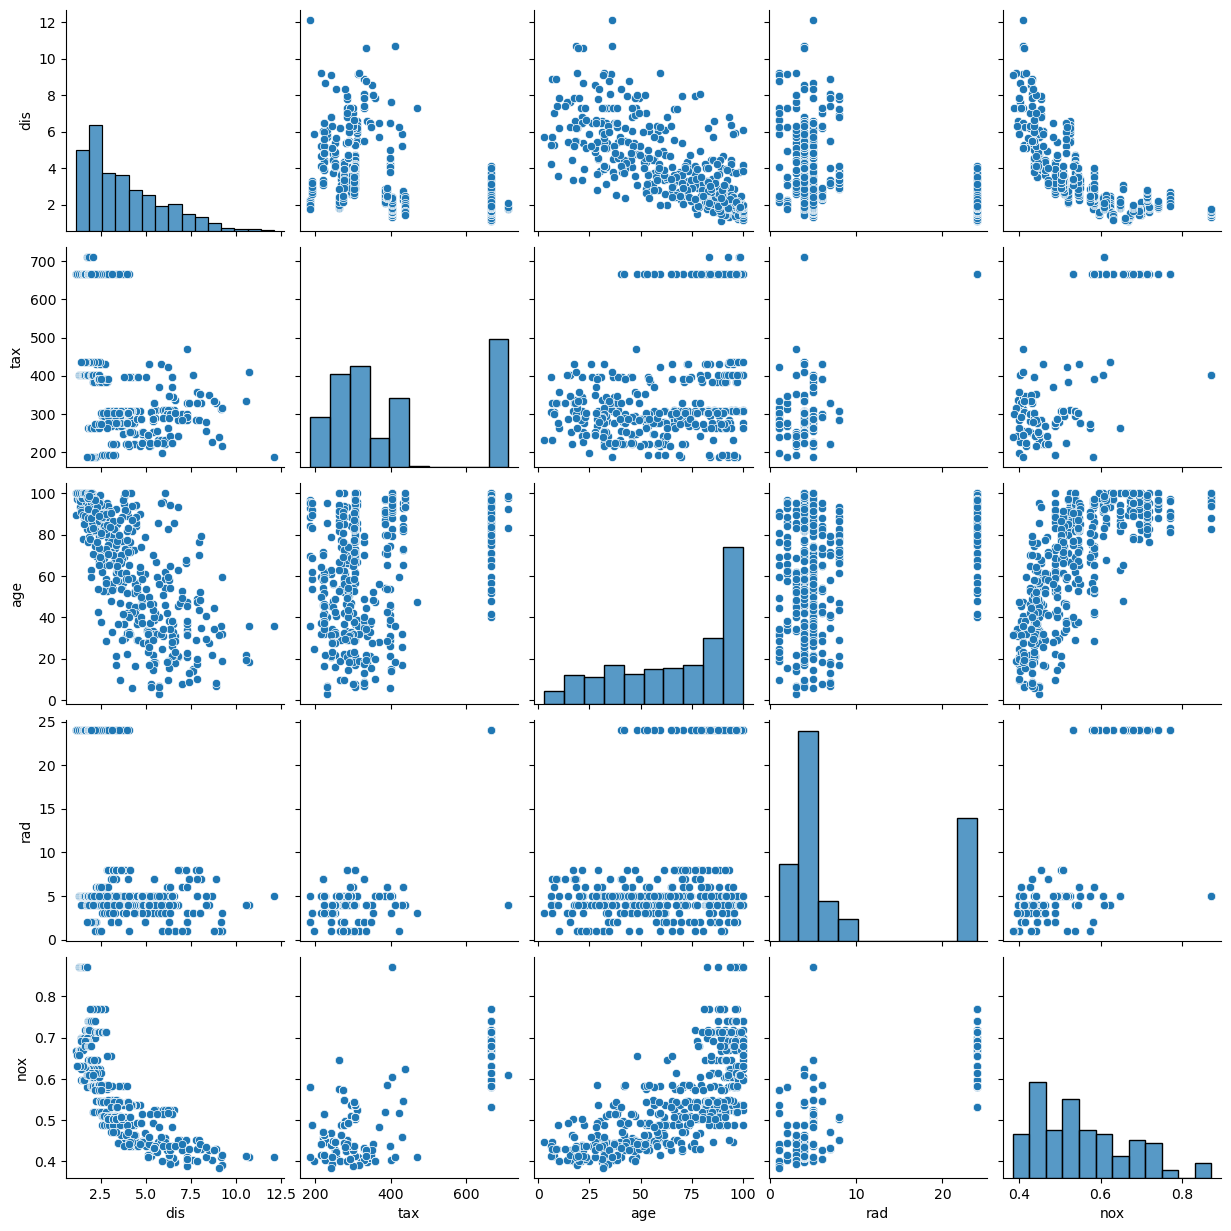

In [119]:
sns.pairplot(data=X)

- There's high colinearity amongst some of these features. We need to address this with some sort of feature selection in the future, not to mention cross validation. For now we'll throw a few things at it.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN1": KNeighborsClassifier(n_neighbors=1),
    "KNN2": KNeighborsClassifier(n_neighbors=2),
    "KNN3": KNeighborsClassifier(n_neighbors=3),
    "KNN4": KNeighborsClassifier(n_neighbors=4),
    "KNN5": KNeighborsClassifier(n_neighbors=5),
    "KNN6": KNeighborsClassifier(n_neighbors=6),
}

# Loop through the models, train, and evaluate
results = {}
for model_name, model in models.items():
    #print(f"--- Training {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    #print(f"Accuracy: {accuracy:.4f}\n")        

# Print all results
print("--- Model Comparison ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

--- Model Comparison ---
Logistic Regression: Accuracy = 0.8425
LDA: Accuracy = 0.8583
QDA: Accuracy = 0.9291
KNN1: Accuracy = 0.9449
KNN2: Accuracy = 0.9449
KNN3: Accuracy = 0.9370
KNN4: Accuracy = 0.9291
KNN5: Accuracy = 0.9213
KNN6: Accuracy = 0.9213
